In [1]:
import os
import cv2
import glob
import pathlib
import PIL, PIL.Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
base_dir = '/content/drive/MyDrive'
data_dir = os.path.join(base_dir, 'BSc_Project', 'out')
a_dataset = pathlib.Path(os.path.join(data_dir, 'A'))

In [3]:
image_count = len(list(a_dataset.glob('*/*.png')))
print('number of total images:', image_count, '\n\n')

number of total images: 948 




In [4]:
batch_size = 128
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  a_dataset,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  a_dataset,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 948 files belonging to 2 classes.
Using 759 files for training.
Found 948 files belonging to 2 classes.
Using 189 files for validation.
['norm', 'sch']


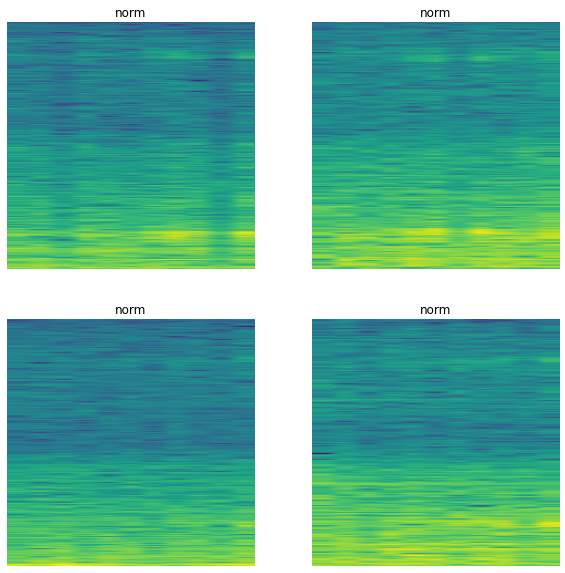

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

####**CNN classification with a simple model**

In [10]:
num_classes = len(class_names)

simple_model = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.Conv2D(128, 3, activation='relu'),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.0001)
simple_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


simple_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60)

Epoch 1/60
6/6 [==============================] - 5s 461ms/step - loss: 0.6915 - accuracy: 0.5428 - val_loss: 0.6989 - val_accuracy: 0.4868
Epoch 2/60
6/6 [==============================] - 3s 431ms/step - loss: 0.6897 - accuracy: 0.5428 - val_loss: 0.6959 - val_accuracy: 0.4868
Epoch 3/60
6/6 [==============================] - 3s 431ms/step - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.6938 - val_accuracy: 0.4868
Epoch 4/60
6/6 [==============================] - 3s 432ms/step - loss: 0.6852 - accuracy: 0.5428 - val_loss: 0.6920 - val_accuracy: 0.4868
Epoch 5/60
6/6 [==============================] - 3s 435ms/step - loss: 0.6758 - accuracy: 0.5428 - val_loss: 0.6764 - val_accuracy: 0.5344
Epoch 6/60
6/6 [==============================] - 3s 434ms/step - loss: 0.6600 - accuracy: 0.5903 - val_loss: 0.6474 - val_accuracy: 0.6825
Epoch 7/60
6/6 [==============================] - 3s 437ms/step - loss: 0.6286 - accuracy: 0.6798 - val_loss: 0.5961 - val_accuracy: 0.7407
Epoch 8/60
6/6 [====

####**CNN classification with a VGG-16 model**

In [11]:
num_classes = len(class_names)

vgg16_model = keras.Sequential()
vgg16_model.add(layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg16_model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(4096,activation="relu"))
vgg16_model.add(layers.Dense(4096,activation="relu"))
vgg16_model.add(layers.Dense(num_classes, activation="softmax"))
vgg16_model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
vgg16_model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

vgg16_model.fit(train_ds, validation_data=val_ds, epochs=60)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [12]:
models_path = os.path.join(base_dir, 'BSc_Project', 'models')
vgg16_model.save(os.path.join(models_path, 'vgg16_model.h5'))
simple_model.save(os.path.join(models_path, 'simple_model.h5'))

use `model = keras.models.load_model('path/to/location')` to load the models

In [ ]:
models_path = os.path.join(base_dir, 'BSc_Project', 'models')
simple_model = keras.models.load_model(os.path.join(models_path, 'simple_model.h5')) 
vgg16_model = keras.models.load_model(os.path.join(models_path, 'vgg16_model.h5')) 


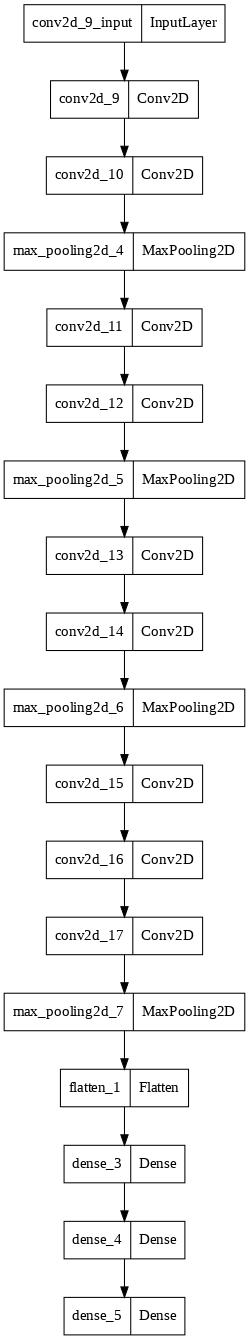

In [5]:
tf.keras.utils.plot_model(simple_model, dpi=75)

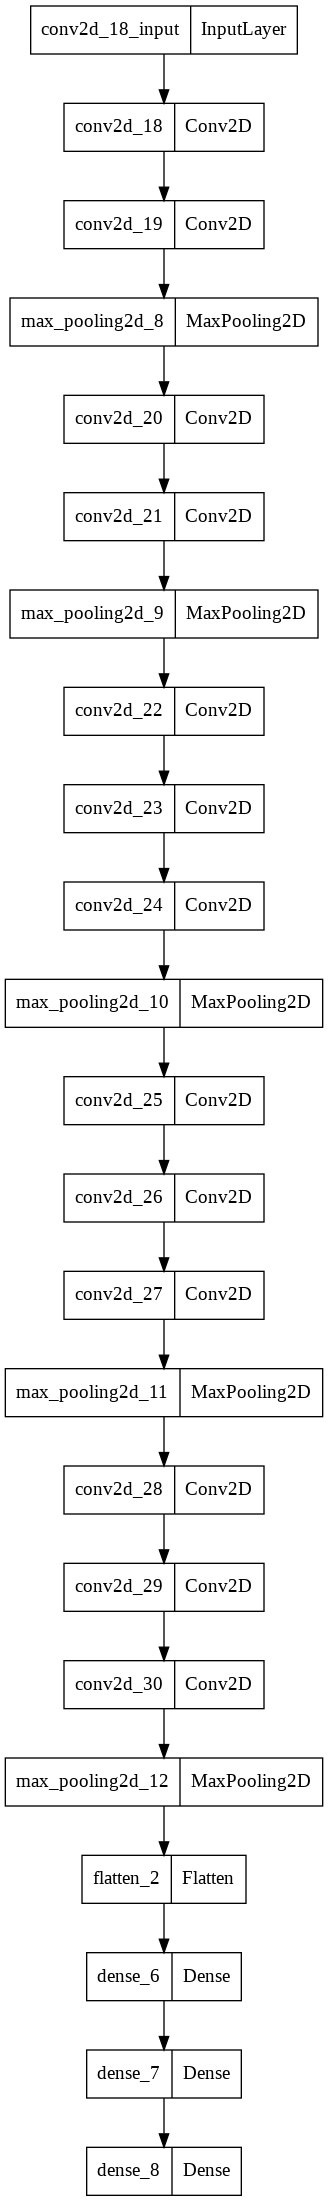

In [6]:
tf.keras.utils.plot_model(vgg16_model)

**Evaluations**

In [13]:
def evaluate(model, name='model'):
  loss, acc = model.evaluate(val_ds, batch_size= batch_size)
  print(f"{name}'s accuracy: {round((acc * 100), 2)}%")

evaluate(simple_model, 'simple CNN')
evaluate(vgg16_model, 'VGG-16')

2/2 [==============================] - 0s 77ms/step - loss: 0.1967 - accuracy: 0.9365
simple CNN's accuracy: 93.65%
2/2 [==============================] - 1s 294ms/step - loss: 0.2217 - accuracy: 0.9630
VGG-16's accuracy: 96.3%


In [34]:
def predict(model):
  return np.argmax(model.predict(val_ds), axis=-1)

def get_labels(dataset, batch_count=2):
  lst = []
  for im, label in val_ds.take(2):
    lst.extend(label.numpy())
  return np.array(lst)

vgg16_comparison_list = list(zip(predict(vgg16_model), get_labels(val_ds)))
simple_comparison_list = list(zip(predict(simple_model), get_labels(val_ds)))
print("VGG-16 (predictions, true labels): ", vgg16_comparison_list)
print("simple model (predictions, true labels): ", vgg16_comparison_list)

2/2 [==============================] - 0s 132ms/step
VGG-16 (predictions, true labels):  [(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1)